# Máy học nâng cao - Lab 02
# Họ tên: Nguyễn Phú Thành - MSSV: 18110014

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


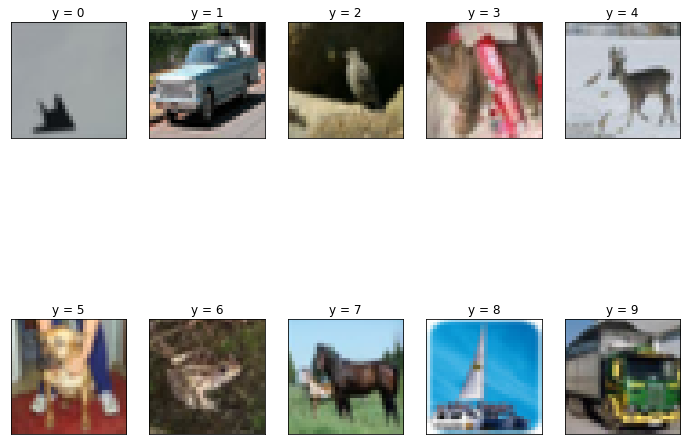

In [3]:
fig, axes = plt.subplots(figsize = (12, 10), nrows = 2, ncols = 5)
rnd = np.random.RandomState(0)
for label, ax in zip(np.unique(y_train), axes.flatten()):
    subset = X_train[(y_train == label).flatten()]
    index = rnd.choice(subset.shape)
    ax.imshow(subset[index - 1])
    ax.set(title = f'y = {label}', xticks = [], yticks = [])
plt.show()

In [4]:
X_train, X_test = X_train.astype(np.float)/255.0, X_test.astype(np.float)/255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)

In [5]:
for (X, y) in zip((X_train, X_valid, X_test), (y_train, y_valid, y_test)):
    print(X.shape, y.shape)

(45000, 32, 32, 3) (45000, 1)
(5000, 32, 32, 3) (5000, 1)
(10000, 32, 32, 3) (10000, 1)


Hãy code thử mạng VGG16 và nêu cách chọn ra epoch thứ bao nhiêu làm cho model tốt nhất </br>
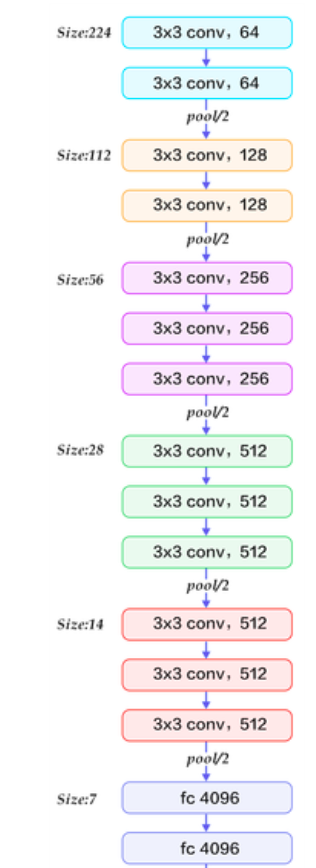

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

vgg_16 = Sequential()

# Block 1
vgg_16.add(
    Conv2D(
        filters = 64, 
        kernel_size = (3, 3), 
        strides = (1, 1), 
        padding = "same", 
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 64, 
        kernel_size = (3, 3), 
        strides = (1, 1), 
        padding = "same", 
        activation = tf.nn.relu
    )
)

vgg_16.add(
    MaxPooling2D(
        pool_size = (2, 2), 
        strides = (2, 2)
    )
)
# Block 2
vgg_16.add(
    Conv2D(
        filters = 128,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 128,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)

vgg_16.add(
    MaxPooling2D(
        pool_size = (2, 2), 
        strides = (2, 2)
    )
)
# Block 3
vgg_16.add(
    Conv2D(
        filters = 256,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 256,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 256,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    MaxPooling2D(
        pool_size = (2, 2), 
        strides = (2, 2)
    )
)
# Block 4
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    MaxPooling2D(
        pool_size = (2, 2), 
        strides = (2, 2)
    )
)
# Block 5
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    MaxPooling2D(
        pool_size = (2, 2), 
        strides = (2, 2)
    )
)
# block 6
vgg_16.add(Flatten())
vgg_16.add(
    Dense(
        units = 4096, 
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Dropout(rate = 0.5)
)
vgg_16.add(
    Dense(
        units = 4096, 
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Dropout(rate = 0.5)
)
vgg_16.add(
    Dense(
        units = 10, 
        activation = tf.nn.softmax
    )
)
vgg_16.build(input_shape = (None, 32, 32, 3))
vgg_16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [7]:
vgg_16.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-5), 
    metrics = ['accuracy']
)

In [8]:
def lr_scheduler(epoch, lr):
    if epoch <= 15:
        return lr
    else:
        return lr * np.exp(-0.1)

In [9]:
mc = tf.keras.callbacks.ModelCheckpoint(
    filepath = "epoch: {epoch:02d}.hdf5", 
    monitor = 'val_loss',
    mode = 'min', 
    verbose = 0,
    save_best_only = False
)
lrs = tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose = 0)
history = vgg_16.fit(
    X_train, y_train,
    epochs = 30,
    batch_size = 512,
    validation_data = (X_valid, y_valid),
    callbacks = (mc, lrs)
)

Epoch 1/30
88/88 [==============================] - 81s 494ms/step - loss: 2.2017 - accuracy: 0.1434 - val_loss: 1.9997 - val_accuracy: 0.2016
Epoch 2/30
88/88 [==============================] - 33s 378ms/step - loss: 1.9254 - accuracy: 0.2346 - val_loss: 1.8093 - val_accuracy: 0.2788
Epoch 3/30
88/88 [==============================] - 34s 382ms/step - loss: 1.7610 - accuracy: 0.3072 - val_loss: 1.6599 - val_accuracy: 0.3376
Epoch 4/30
88/88 [==============================] - 34s 383ms/step - loss: 1.6484 - accuracy: 0.3545 - val_loss: 1.5452 - val_accuracy: 0.3940
Epoch 5/30
88/88 [==============================] - 34s 384ms/step - loss: 1.5667 - accuracy: 0.3861 - val_loss: 1.4704 - val_accuracy: 0.4292
Epoch 6/30
88/88 [==============================] - 34s 384ms/step - loss: 1.4794 - accuracy: 0.4251 - val_loss: 1.4043 - val_accuracy: 0.4634
Epoch 7/30
88/88 [==============================] - 34s 384ms/step - loss: 1.4030 - accuracy: 0.4641 - val_loss: 1.3611 - val_accuracy: 0.4900

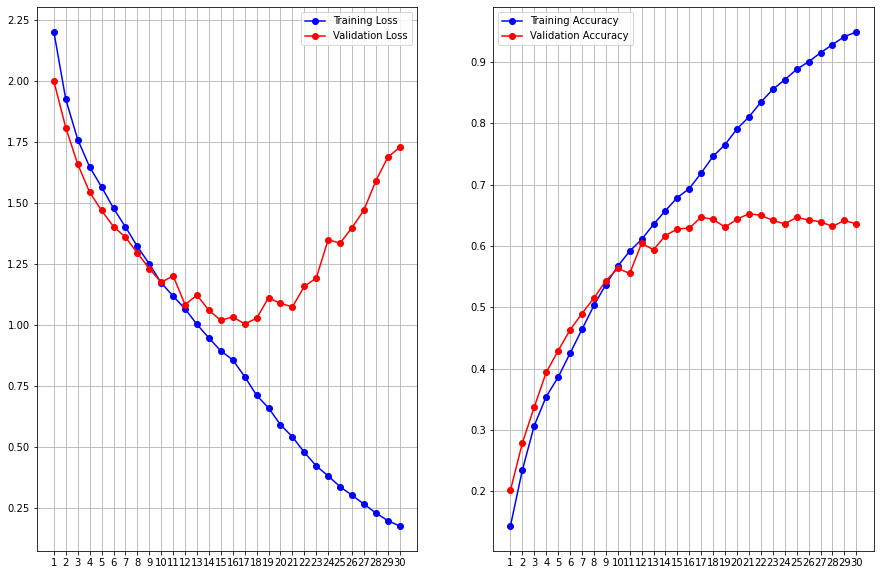

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))
axes[0].plot(np.arange(1, 31, step = 1), history.history['loss'], color = 'b', marker = 'o', label = 'Training Loss')
axes[0].plot(np.arange(1, 31, step = 1), history.history['val_loss'], color = 'r', marker = 'o', label = 'Validation Loss')
axes[0].set(xticks = np.arange(1, 31, step = 1))
axes[0].grid(True)

axes[1].plot(np.arange(1, 31, step = 1), history.history['accuracy'], color = 'b', marker = 'o', label = 'Training Accuracy')
axes[1].plot(np.arange(1, 31, step = 1), history.history['val_accuracy'], color = 'r', marker = 'o', label = 'Validation Accuracy')
axes[1].set(xticks = np.arange(1, 31, step = 1))
axes[1].grid(True)

axes[0].legend()
axes[1].legend()

Ta chọn mô hình ở epoch thứ 12 vì loss và accuracy trên tập validation từ epoch thứ 12 trở đi không cải thiện, và các mô hình từ sau epoch 12 có xu hướng overfit

In [11]:
model = tf.keras.models.load_model("/content/epoch: 12.hdf5")
result = model.evaluate(X_test, y_test)
print("Loss và Accuracy trên tập test của mô hình được chọn là {} {}".format(result[0],result[1]))

313/313 [==============================] - 7s 20ms/step - loss: 1.1069 - accuracy: 0.5991
Loss và Accuracy trên tập test của mô hình được chọn là 1.1068544387817383 0.5990999937057495
